# Rössler attractor
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/7/75/Roessler_attractor.png" width="500"/>
</div>

In this notebook, we will explore the Rössler attractor. The Rössler attractor is a system of three non-linear ordinary differential equations first studied by Otto Rössler in 1976. It is one of the simplest examples of a strange attractor, a type of chaotic attractor.

## Mathematical model

The Rössler system is defined by the following set of non-linear ordinary differential equations:

$$\begin{align} \dot{x} &= -y - z \\ \dot{y} &= x + ay \\ \dot{z} &= b + z(x - c) \end{align}$$

where $a$, $b$ and $c$ are positive constants.

## Implementation

### Import libraries

First, we import the necessary libraries. We will use the next libraries:

* [numpy](http://www.numpy.org/): Fundamental package for scientific computing with Python.
* [matplotlib](https://matplotlib.org/): Python plotting library.
* [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/): Interactive HTML widgets for Jupyter notebooks and the IPython kernel.
* [mpl_toolkits.mplot3d](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html): 3D plotting in Matplotlib.
* [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html): Integration and ordinary differential equation solvers in Python.
* [sympy](https://www.sympy.org/en/index.html): Python library for symbolic mathematics.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import sympy as sym
sym.init_printing()

### Define the Rössler system

First, we define the Rössler system as a function. 

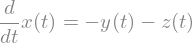

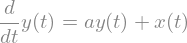

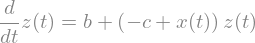

In [39]:
# Define the symbolic variables
x, y, z, t = sym.symbols('x y z t', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)
z = sym.Function('z')(t)
xdot, ydot, zdot = sym.diff(x, t), sym.diff(y, t), sym.diff(z, t)

# Define the parameters
a, b, c = sym.symbols('a b c', real=True)

# Define the system
system = [sym.Eq(xdot, -y-z),
          sym.Eq(ydot, x+a*y),
          sym.Eq(zdot, b+z*(x-c))]
for eq in system:
    display(eq)

### Equilibrium points

Now, we find the equilibrium points of the Rössler system. We introduce the variables: $\dot{x} = x', \dot{y} = y', \dot{z} = z'$
We have the following system of equations:
$$x' = -y-z$$
$$y' = x+a\cdot y$$
$$z' = b+z\cdot(x-c)$$
and we make $x', y', z'$ equal to zero

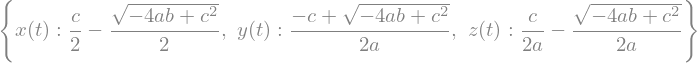

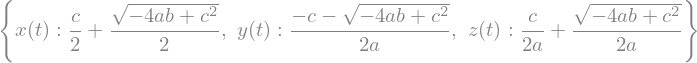

In [38]:
# We substitute the variables value xdot, ydot, zdot for 0
s = [sym.Eq(0, eq.rhs) for eq in system]
for eq in s:
    display(eq)


# We solve the system
solutions = sym.solve(s, [x, y, z], dict=True)
for sol in solutions:
    display(sol)

### Stability of the equilibrium points

We will use the [Jacobian matrix](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant) to determine the stability of the equilibrium points. The Jacobian matrix is defined as follows:

$$J = \begin{bmatrix} \dfrac{\partial f}{\partial x} & \dfrac{\partial f}{\partial y} & \dfrac{\partial f}{\partial z} \\ 
\\\dfrac{\partial g}{\partial x} & \dfrac{\partial g}{\partial y} & \dfrac{\partial g}{\partial z} \\ \\ \dfrac{\partial h}{\partial x} & \dfrac{\partial h}{\partial y} & \dfrac{\partial h}{\partial z} \end{bmatrix}$$

where 
$$ f = -y - z $$
$$ g = x + ay $$
$$ h = b + z(x - c) $$

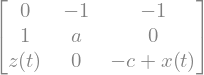

In [46]:
# Define the jacobi matrix
f = system[0].rhs
g = system[1].rhs
h = system[2].rhs

# Get the jacobian matrix
J = sym.Matrix([f, g, h]).jacobian([x, y, z])
display(J)

as we get the following Jacobian matrix:

$$\left[\begin{matrix}0 & -1 & -1\\ \\1 & a & 0\\ \\ z{\left(t \right)} & 0 & - c + x{\left(t \right)}\end{matrix}\right]$$

now we can get the eigenvalues of the Jacobian matrix and determine the stability of the equilibrium points. We will use:

$$ A - \lambda I = \left[\begin{matrix}0 & -1 & -1\\ \\1 & a & 0\\ \\ z{\left(t \right)} & 0 & - c + x{\left(t \right)}\end{matrix}\right] - \lambda \left[\begin{matrix}1 & 0 & 0\\ \\0 & 1 & 0\\ \\0 & 0 & 1\end{matrix}\right] = \left[\begin{matrix}0 - \lambda & -1 & -1\\ \\1 & a - \lambda & 0\\ \\ z{\left(t \right)} & 0 & - c + x{\left(t \right)} - \lambda\end{matrix}\right]$$

and the determinant of the matrix is:


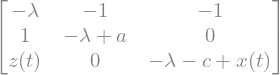

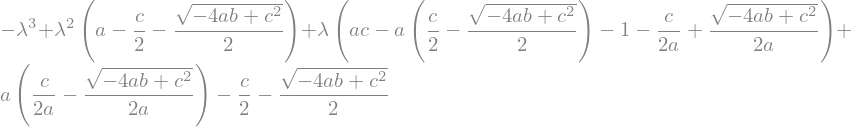

In [78]:
# A - lambda * I
l = sym.symbols('\lambda')
A = J - l * sym.eye(3)
display(A)

# Now, get the determinant
det = A.det()
# Collect the coefficients to get a better view
det = det.collect(l)
display(det)

# We substitute the values of x, y, z for the equilibrium points
det = det.subs([(x, solutions[0][x]), (y, solutions[0][y]), (z, solutions[0][z])])
display(det)

Rössler originally putted the next parameters: $a = 0.2$, $b = 0.2$ and $c = 5.7$. We will use the same parameters. So, we have the following equilibrium points and their stability:

In [98]:
# Equilibrium points
equilibrium_points = {x: solutions[0][x].subs([(a, 0.2), (b, 0.2), (c, 5.7)]),
                        y: solutions[0][y].subs([(a, 0.2), (b, 0.2), (c, 5.7)]),
                        z: solutions[0][z].subs([(a, 0.2), (b, 0.2), (c, 5.7)])}
for eq, val in equilibrium_points.items():
    display(sym.Eq(eq, val))


# Stability analysis, get the eigenvalues
eigenvalues =  J.subs([(x, solutions[0][x]), (y, solutions[0][y]), (z, solutions[0][z])]).subs([(a, 0.2), (b, 0.2), (c, 5.7)]).eigenvals()
for eq in eigenvalues:
    abs_eq = sym.Abs(eq)
    display(eq, abs_eq)

### Plot the Rössler system

Now, we plot the Rössler system. We will use the [scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) function to solve the system of differential equations. We will use the next parameters: $a = 0.2$, $b = 0.2$ and $c = 5.7$.

In [209]:
## Define the system
def rossler(x, t, a, b, c):
    return [-x[1] - x[2],
            x[0] + a * x[1],
            b + x[2] * (x[0] - c)]

# Define the parameters
a, b, c = 0.2, 0.2, 5.7

# Define the initial conditions
x0 = [1, 1, 1]

# Define the time
t = np.arange(0, 400, 0.01)

# Solve the system
x = odeint(rossler, x0, t, args=(a, b, c))


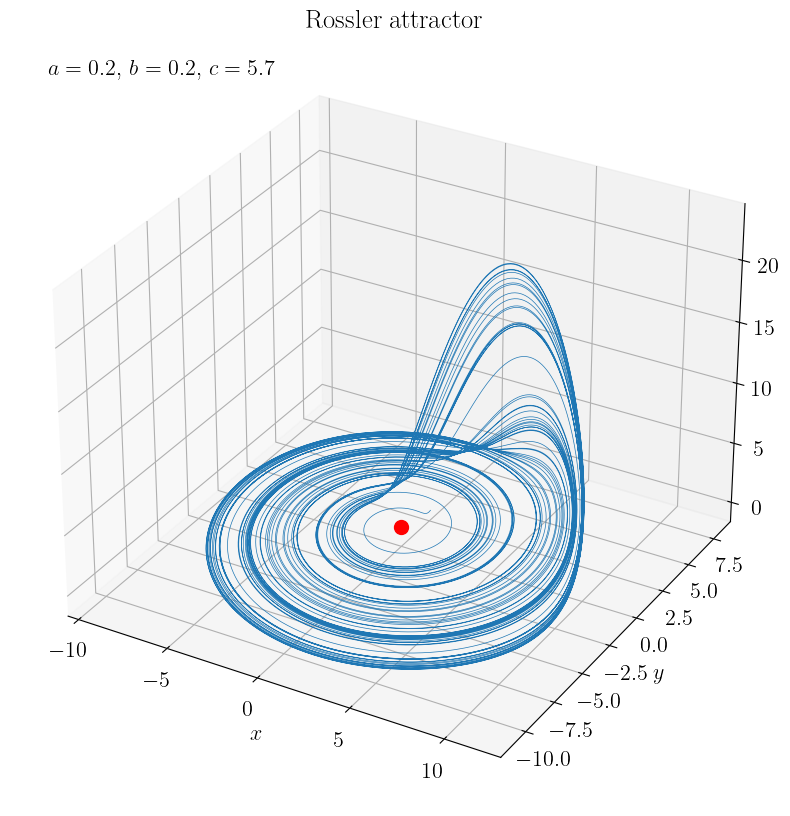

In [210]:
# Use LaTeX fonts in the plot and increase the font size
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=16)

# Plot the results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x[:, 0], x[:, 1], x[:, 2], lw=0.5)
eq_point = [point.subs([(a, 0.2), (b, 0.2), (c, 5.7)]) for point in equilibrium_points.values()]
ax.scatter(eq_point[0], eq_point[1], eq_point[2], c='r', s=100)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('Rossler attractor')
ax.text2D(0.05, 0.95, f'$a = {a}$, $b = {b}$, $c = {c}$', transform=ax.transAxes)
plt.savefig('rossler_attractor.png', dpi=600, bbox_inches='tight', pad_inches=0.1, transparent=True)
plt.show()

We can also plot the phase space of the Rössler system. Only for x and x' we have the following plot:

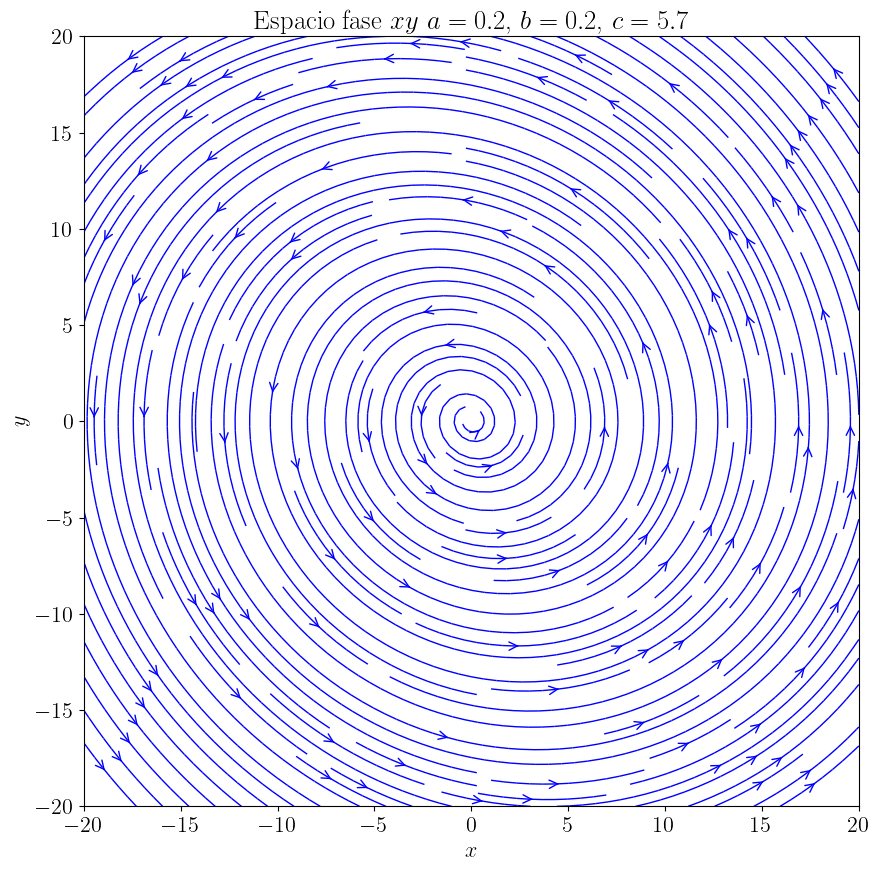

In [132]:
xvalues, yvalues = np.meshgrid(np.linspace(-20, 20, 20), np.linspace(-20, 20, 20))
t = 0
u, v = np.zeros(xvalues.shape), np.zeros(yvalues.shape)
NI, NJ = xvalues.shape
for i in range(NI):
    for j in range(NJ):
        x = xvalues[i, j]
        y = yvalues[i, j]
        z = 0
        u[i,j] = -y - z
        v[i,j] = x + a * y

# Use LaTeX fonts in the plot and increase the font size
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=16)

# Plot the results
plt.figure(figsize=(10, 10))
Q = plt.streamplot(xvalues, yvalues, u, v, color='b', linewidth=1, density=2, arrowstyle='->', arrowsize=1.5)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Espacio fase $xy$  $a = 0.2$, $b = 0.2$, $c = 5.7$')
plt.savefig('rossler_phase_space.png', dpi=600, bbox_inches='tight', pad_inches=0.1, transparent=True)
plt.show()

Plotting the 3d phase space of the Rössler system:

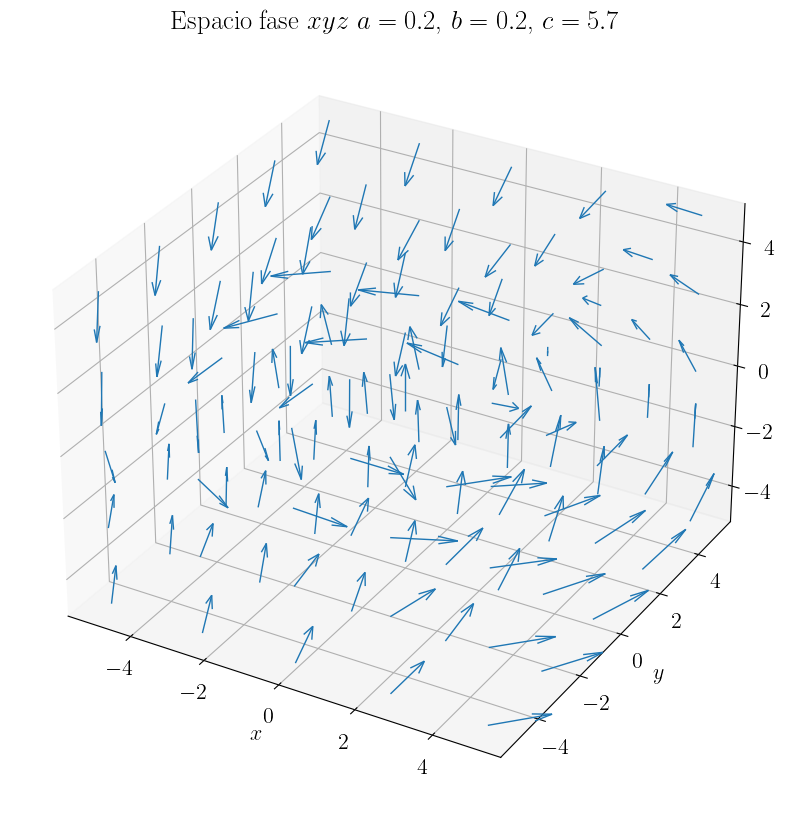

In [208]:
xvalues, yvalues, zvalues = np.meshgrid(np.linspace(-5, 5, 5), np.linspace(-5, 5, 5), np.linspace(-5, 5, 5))
t = 0
u, v, w = np.zeros(xvalues.shape), np.zeros(yvalues.shape), np.zeros(zvalues.shape)
NI, NJ, NK = xvalues.shape
for i in range(NI):
    for j in range(NJ):
        for k in range(NK):
            x = xvalues[i, j, k]
            y = yvalues[i, j, k]
            z = zvalues[i, j, k]
            u[i,j,k] = -y - z
            v[i,j,k] = x + a * y
            w[i,j,k] = b + z * (x - c)

# Plot the results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(xvalues, yvalues, zvalues, u, v, w, normalize=True, length=1.5, linewidth=1, cmap='coolwarm')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('Espacio fase $xyz$  $a = 0.2$, $b = 0.2$, $c = 5.7$')
plt.savefig('rossler_phase_space_3d.png', dpi=600, bbox_inches='tight', pad_inches=0.1, transparent=True)
plt.show()